# Feature evaluation

### What is a feature?

A feature in a dataset refers to an individual measurable property or characteristic of the data points. It represents a specific aspect or attribute of the data that is used to describe or distinguish the observations. Features can be numerical (e.g., age, height) or categorical (e.g., gender, color), and they play a crucial role in machine learning and data analysis tasks as they provide the input variables for modeling and analysis.

### What is a target?

The target in a machine learning context refers to the variable that we want to predict or estimate based on the input features. It is the output variable that we are trying to model or analyze. In supervised learning, the target is typically a numerical value (regression) or a categorical label (classification) that we want to predict based on the input features.

### Why is feature selection is important?

Choosing the right features for our model is important because it directly impacts the performance and effectiveness of our machine learning or data analysis tasks. Blindly including all features and leaving the algorithm to figure out which are important is a bad idea. But by selecting relevant and informative features, we can improve the accuracy, efficiency, and interpretability of our models.

Here are a few reasons why feature selection is important:

1. **Improved model performance**: Including irrelevant or redundant features in our model can lead to overfitting, where the model becomes too complex and performs poorly on new, unseen data. By selecting the most relevant features, we can reduce the complexity of the model and improve its generalization ability, leading to better performance on unseen data.

2. **Reduced dimensionality**: In many real-world datasets, the number of features can be large, which can lead to computational inefficiency and increased model complexity. Feature selection helps in reducing the dimensionality of the dataset by identifying and removing irrelevant or redundant features. This not only improves computational efficiency but also makes the model easier to interpret.

3. **Interpretability and insights**: Selecting meaningful features allows us to gain insights into the underlying relationships and patterns in the data. By focusing on the most important features, we can better understand the factors that contribute to the target variable and make more informed decisions based on the model's output.

4. **Faster training and inference**: With a reduced number of features, the training and inference time of our models can be significantly reduced. This is especially important when working with large datasets or real-time applications where speed is crucial.

Overall, feature selection helps us to build more accurate, efficient, and interpretable models by focusing on the most relevant and informative features. It is an essential step in the machine learning and data analysis pipeline.

 ### Loading dataset

First we'll load the dataset and display the first 5 rows using pandas.

In [27]:
import pandas as pd

df = pd.read_csv('california-housing.csv')
df.dropna(inplace=True) # Drop rows with NaN values

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
1001,-121.77,37.68,36.0,1687.0,372.0,950.0,372.0,3.5532,158400.0,INLAND
1002,-121.78,37.69,34.0,2358.0,498.0,1157.0,461.0,3.3618,174600.0,INLAND
1003,-121.78,37.69,35.0,2853.0,588.0,1761.0,572.0,4.3533,168400.0,INLAND
1004,-121.79,37.69,25.0,6296.0,1082.0,3200.0,1047.0,4.5357,188400.0,INLAND


### Preprocessing

Next we'll convert ocean_promixty to use numerical category representations.

E.g. "NEAR BAY" is now represented by the number 1.

In [28]:
df['ocean_proximity'] = df['ocean_proximity'].astype('category')
df['ocean_proximity'] = df['ocean_proximity'].cat.codes

df.head(1000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
1001,-121.77,37.68,36.0,1687.0,372.0,950.0,372.0,3.5532,158400.0,1
1002,-121.78,37.69,34.0,2358.0,498.0,1157.0,461.0,3.3618,174600.0,1
1003,-121.78,37.69,35.0,2853.0,588.0,1761.0,572.0,4.3533,168400.0,1
1004,-121.79,37.69,25.0,6296.0,1082.0,3200.0,1047.0,4.5357,188400.0,1


### Separate features and target

For this study, I want my model to predict media house value based on input features such as number of rooms, location, house age etc.

So I will 

In [29]:
X = df.drop(columns=['median_house_value']) # Features
y = df['median_house_value'] # Target

## Feature Evaluation Methods

Here are some methods we can use to identify the best features to include in our model...

### 1. Exploratory Data Analysis (EDA)

**Correlation Analysis**: Use correlation matrices to identify features that have a strong linear relationship with the target variable.

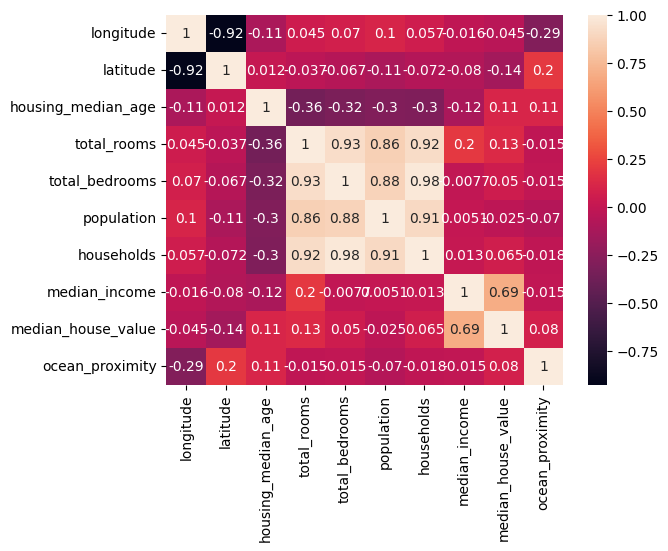

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### 2. Statistical tests

**ANOVA/T-test**:

In [31]:
from scipy.stats import f_oneway, ttest_ind

f_statistic, p_value = f_oneway(df['median_income'], df['median_house_value'])
print(f_statistic, p_value)

65615.64726023436 0.0


### Feature importance and selection methods

**Univariate feature selection**: use statistical tests to select features with the highest correlation with the target variable

In [32]:
from sklearn.feature_selection import SelectKBest, f_regression

best_features = SelectKBest(score_func=f_regression, k='all') # Identify the best features
fit = best_features.fit(X, y) # Fit the model

# Display the scores of each feature
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature', 'Score']
feature_scores.head(10).nlargest(10, 'Score')

,Feature,Score
7,median_income,18398.896423
1,latitude,436.553651
3,total_rooms,369.570525
2,housing_median_age,234.089601
8,ocean_proximity,133.221103
6,households,86.402326
4,total_bedrooms,50.563173
0,longitude,42.195221
5,population,13.085778


This method suggests that median_income has the strongest correlation with median_house_value, which makes sense. We can also see that total_rooms, house median age, and ocean promixity also have a strong correlation with house value. Interesting latitude seems to have a strong impact, potentially because south california is more expensive? Or because this correlates with how close they are to big cities such as San Francisco, and Los Angeles.

### Recursive feature elimination (RFE)

Recursively removes features and builds a model on those features that remain. It uses model accuracy to identify which features contribute the most to predicting the target variable.

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()

rfe = RFE(model, n_features_to_select=5) # Select the 5 best features
fit = rfe.fit(X, y)

selected_features = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': fit.ranking_,
    'Selected': fit.support_
})

selected_features.nsmallest(25, 'Ranking')

,Feature,Ranking,Selected
0,longitude,1,True
1,latitude,1,True
2,housing_median_age,1,True
7,median_income,1,True
8,ocean_proximity,1,True
4,total_bedrooms,2,False
6,households,3,False
5,population,4,False
3,total_rooms,5,False


### Feature importance from Tree-based models

Use tree-based models like Random Forests or Gradient Boosting to get an estimate of feature importance.

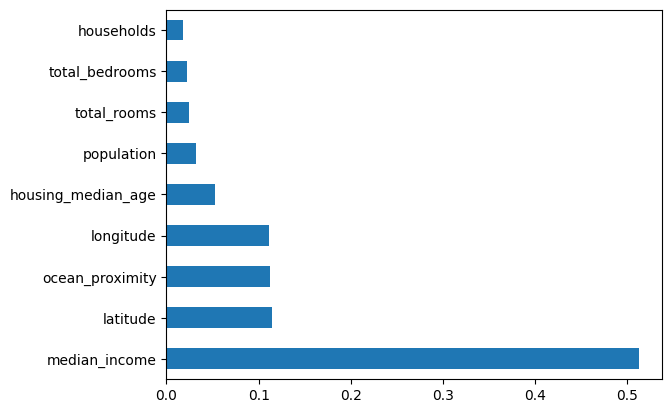

In [34]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

### 4. Dimensionality Reduction Techniques

Principal Component Analysis (PCA): Transforms features into a set of linearly uncorrelated components while retaining most of the variance.

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
print(principalComponents)

[[-2130.81210526  -253.0388289 ]
 [ 4528.87377469 -1033.0677437 ]
 [-1523.10438612  -352.45151353]
 ...
 [ -530.21740415  -209.57761687]
 [-1013.43435397  -282.07576349]
 [  132.26144581   -92.97364156]]


**L1 Regularization (Lasso Regression)**: Performs feature selection by shrinking some coefficients to zero.

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
print(lasso.coef_)

[-4.27478902e+04 -4.25214339e+04  1.15803775e+03 -8.24446317e+00
  1.13832310e+02 -3.83955045e+01  4.76878172e+01  4.02947985e+04
 -3.21367005e+01]


### 5. Model Evaluation

**Cross-validation**: use cross-validation to evaluate the performance of your model with different subsets of features.

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)

[-4.50444186e+09 -5.64137562e+09 -6.00889253e+09 -5.36101001e+09
 -4.50100938e+09]
